## Observations and Insights

The following oservations can be made about the study:

 1. Out of all the drugs used in the study. Capomulin and Ramicane were the most widely used on the total number of mice. Between 18% - 30% more than the other drugs.
 
 
 2. The poplation of subjects (mice) in the study, are almost evenly divided between males and females. It could have been deliberately balanced to ensure that sex will not be much of a factor in the study.
 
 
 3. Capomulin and Ramicane were the two drugs shown to have the most impact on reducing on the tumor sizes on sujects. This could represent efficacies of these two drugs. Or it could be the result of Capomulin and Ramicane having the most data point out of all the treatments.
 
 
 4. Capomulin and Ramicane has the lowest interquartile range for their tumor volumes data dstibutions. Which can show uniformity in the data and strengthen their claim for efficacies in reducing tumor volumes.
 
 
 5. The correlation between mouse weight and average tumor volume has a positive correlation. And with correlation coefficient of 0.84, this reperesent a strong correlation.

In [2]:
%matplotlib notebook
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import scipy.stats as stats
import numpy as np

# data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset @ common index 'Mouse ID'
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID",how="inner")
# Display the data table for preview
#check for null values

#mouse_df.define()
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
#mouse_df["Mouse ID"].unique()
#mouse_count_df = len(mouse_df["Mouse ID"].unique())
mouse_count_df = mouse_df["Mouse ID"].count()
mouse_count_df = pd.DataFrame({"Number of Mice" : [mouse_count_df]})
mouse_count_df

,Number of Mice
0,1893


In [4]:
#check the length of Mouse ID
mouse_id_check = len(mouse_df["Mouse ID"])
mouse_id_check

1893

In [5]:
#checking number of duplicates
ids = mouse_df["Mouse ID"]
mouse_id_duplicates_df = mouse_df[ids.isin(ids[ids.duplicated()])]
len(mouse_id_duplicates_df["Mouse ID"])

duplicates_numbers_df =  len(mouse_df["Mouse ID"]) - len(mouse_id_duplicates_df["Mouse ID"])
duplicates_numbers_df

12

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#g=mouse_df.groupby('Mouse ID')['Timepoint'].value_counts()
#doup_mouse_df = g.where(g>1).dropna()
#print(doup_mouse_df)
doup_mouse_df = mouse_df[mouse_df.duplicated(['Mouse ID', 'Timepoint'])]
doup_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
all_dup_ids = mouse_df[mouse_df.duplicated(['Mouse ID',])]
all_dup_ids

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#remove duplicates in SN
clean_df = mouse_df.drop_duplicates(['Mouse ID', 'Timepoint'])
clean_df

#Group by Mouse ID
#mouse_id_grp_df = no_dups_df.groupby(['Mouse ID'])
#mouse_id_grp_df.head()
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
mouse_id_grp_df = len(clean_df["Drug Regimen"])
mouse_id_grp_df = pd.DataFrame({"Number of Mice" : [mouse_id_grp_df]})
mouse_id_grp_df

,Number of Mice
0,1888


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_statistics_df = clean_df.groupby('Drug Regimen')
summary_statistics_df = summary_statistics_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]

#flatten the index
summary_statistics_df.columns = [''.join(col).strip() for col in summary_statistics_df.columns.values] 

# This method is the most straighforward, creating multiple series and putting them all together at the end.


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_df = pd.DataFrame(summary_statistics_df)

# This method produces everything in a single groupby function
summary_statistics_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

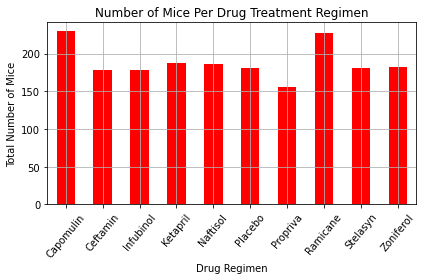

<Figure size 432x288 with 0 Axes>

In [40]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
number_of_mice_df = clean_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
number_of_mice_df = pd.DataFrame(number_of_mice_df)
mice_bar_plot = number_of_mice_df.plot(kind="bar", facecolor="red", legend=False,rot=50)

# Set textual properties
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.title("Number of Mice Per Drug Treatment Regimen")
plt.grid(which='major', linestyle='-')


# Resize plot to display labels
plt.tight_layout()

# Show plot
plt.show()

plt.savefig("images/mice_per_regimens1.png")

In [13]:
number_of_mice_df

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


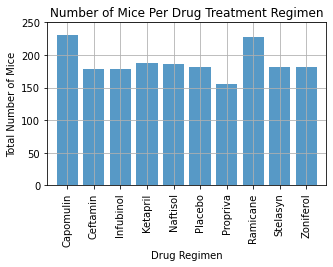

<Figure size 432x288 with 0 Axes>

In [39]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(number_of_mice_df))

#use list comprehension to plot
y_axis = [x for x in x_axis]
plt.figure(figsize=(5,3))

#Labels as the indexes for drug regimen
protocols = number_of_mice_df.reset_index()
protocols

plt.bar(x_axis, number_of_mice_df['Tumor Volume (mm3)'], alpha=0.75, align="center")
plt.xticks(y_axis, protocols['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(number_of_mice_df)-.25)
plt.ylim(0, 250)
plt.grid(which='major', linestyle='-')


# Set textual properties
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Mice")
plt.title("Number of Mice Per Drug Treatment Regimen")

#plt.savefig('mice_bar_plot2')

# Show plot
plt.show()
plt.savefig("images/mice_per_regimens2.png")


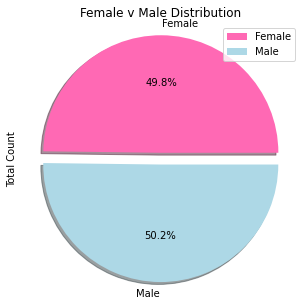

<Figure size 432x288 with 0 Axes>

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#group by gender - use mouse metadata file to get one count for the sexes
#group by Mouse ID and Sex
gender_group_df = mouse_metadata.groupby(["Mouse ID","Sex"])
#gender_group_df.head()

gender_df = pd.DataFrame(gender_group_df.size())

#set dataframe with rename to of genders
gender_df = pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender_df.columns = ["Total Count"]

#Creating Pie Chart
colors = ['hotpink', 'lightblue']
explode = (0, 0.1)
#plot use autopct="%1.1f%%" to display percentages
plot = gender_df.plot.pie(y='Total Count',figsize=(5,5), explode =explode, colors = colors, startangle=1800, shadow = True, autopct="%1.1f%%")
plt.title("Female v Male Distribution")
plt.axis("equal")
plt.show()
plt.tight_layout()
plt.savefig("images/male_female1.png")

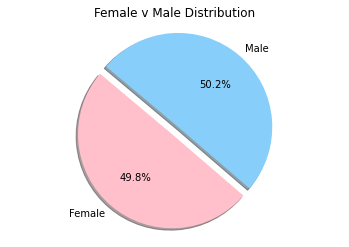

<Figure size 432x288 with 0 Axes>

In [37]:
#Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
Sex = ["Female","Male"]

#List the raw values for male and female
genders_count = [124,125]

#Set colors for each section of the pie
colors = ['pink', 'lightskyblue']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values
plt.title("Female v Male Distribution")
plt.pie(genders_count, explode=explode, labels=Sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")
plt.show()
plt.savefig("images/male_female2.png")

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# get data for aboved regimens using .loc
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
# group by and get max time points
Capomulin_maxtp_df = Capomulin_df.groupby('Mouse ID')['Timepoint'].max()
Ramicane_maxtp_df = Ramicane_df.groupby('Mouse ID')['Timepoint'].max()
Infubinol_maxtp_df = Infubinol_df.groupby('Mouse ID')['Timepoint'].max()
Ceftamin_maxtp_df = Ceftamin_df.groupby('Mouse ID')['Timepoint'].max()

# dataframes
Capomulin_maxtp_df = pd.DataFrame(Capomulin_maxtp_df)
Ramicane_maxtp_df = pd.DataFrame(Ramicane_maxtp_df)
Infubinol_maxtp_df = pd.DataFrame(Infubinol_maxtp_df)
Ceftamin_maxtp_df = pd.DataFrame(Ceftamin_maxtp_df)


# Merge new dataframe with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_maxtp_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge = pd.merge(Ramicane_maxtp_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge = pd.merge(Infubinol_maxtp_df, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge = pd.merge(Ceftamin_maxtp_df, clean_df, on=("Mouse ID","Timepoint"),how="left")

In [18]:
# get tumor volumes for regimens
Capomulin_tumvol = Capomulin_merge["Tumor Volume (mm3)"]
Ramicane_tumvol = Ramicane_merge["Tumor Volume (mm3)"]
Infubinol_tumvol = Infubinol_merge["Tumor Volume (mm3)"]
Ceftamin_tumvol = Ceftamin_merge["Tumor Volume (mm3)"]

# Create empty list to fill with tumor vol data (for plotting)
# If the data is in a dataframe, we use pandas to give quartile calculations
#Capomulin
Capomulin_quart = Capomulin_tumvol.quantile([.25,.5,.75])
Capomulin_lq = Capomulin_quart[0.25]
Capomulin_uq = Capomulin_quart[0.75]
Capomulin_iqr = Capomulin_uq-Capomulin_lq

#Ramicane
Ramicane_quart = Ramicane_tumvol.quantile([.25,.5,.75])
Ramicane_lq = Ramicane_quart[0.25]
Ramicane_uq = Ramicane_quart[0.75]
Ramicane_iqr = Ramicane_uq-Ramicane_lq

#Infubinol
Infubinol_quart = Infubinol_tumvol.quantile([.25,.5,.75])
Infubinol_lq = Infubinol_quart[0.25]
Infubinol_uq = Infubinol_quart[0.75]
Infubinol_iqr = Infubinol_uq-Infubinol_lq


#Ceftamin
Ceftamin_quart = Ceftamin_tumvol.quantile([.25,.5,.75])
Ceftamin_lq = Ceftamin_quart[0.25]
Ceftamin_uq = Ceftamin_quart[0.75]
Ceftamin_iqr = Ceftamin_uq-Ceftamin_lq


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin
Capomulin_lower_bound = Capomulin_lq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_uq + (1.5*Capomulin_iqr)

#Ramicane
Ramicane_lower_bound = Ramicane_lq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_uq + (1.5*Ramicane_iqr)


#Infubinol
Infubinol_lower_bound = Infubinol_lq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_uq + (1.5*Infubinol_iqr)

#Ceftamin
Ceftamin_lower_bound = Ceftamin_lq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_uq + (1.5*Ceftamin_iqr)

    # Determine outliers using upper and lower bounds
    
print(f"Capomulin potential outliers values: below {round(Capomulin_lower_bound,2)} and above {round(Capomulin_upper_bound,2)} could be outliers.")
print(f"Ramicane potential outliers values: below {round(Ramicane_lower_bound,2)} and above {round(Ramicane_upper_bound,2)} could be outliers.")
print(f"Infubinol potential outliers values: below {round(Infubinol_lower_bound,2)} and above {round(Infubinol_upper_bound)} could be outliers.")
print(f"Ceftamin potential outliers values: below {round(Ceftamin_lower_bound,2)} and above {round(Ceftamin_upper_bound,2)} could be outliers.")

Capomulin potential outliers values: below 20.7 and above 51.83 could be outliers.
Ramicane potential outliers values: below 17.91 and above 54.31 could be outliers.
Infubinol potential outliers values: below 36.83 and above 83 could be outliers.
Ceftamin potential outliers values: below 25.36 and above 87.67 could be outliers.


In [19]:
# Individual sumary statistics
# Capomulin
print(f"The lower quartile for Capomulin is: {Capomulin_lq}")
print(f"The upper quartile for Capomulin is: {Capomulin_uq}")
print(f"The interquartile range for Capomulin is: {Capomulin_iqr}")
print(f"The the median for Capomulins is: {Capomulin_quart[0.5]} ")
lower_bound = Capomulin_lq - (1.5*Capomulin_iqr)
upper_bound = Capomulin_uq + (1.5*Capomulin_iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

The lower quartile for Capomulin is: 32.37735684
The upper quartile for Capomulin is: 40.1592203
The interquartile range for Capomulin is: 7.781863460000004
The the median for Capomulins is: 38.125164399999996 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.


In [20]:
# Ramicane
print(f"The lower quartile for Capomulin is: {Ramicane_lq}")
print(f"The upper quartile for Capomulin is: {Ramicane_uq}")
print(f"The interquartile range for Capomulin is: {Ramicane_iqr}")
print(f"The the median for Capomulins is: {Ramicane_quart[0.5]} ")
lower_bound = Ramicane_lq - (1.5*Ramicane_iqr)
upper_bound = Ramicane_uq + (1.5*Ramicane_iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

The lower quartile for Capomulin is: 31.56046955
The upper quartile for Capomulin is: 40.65900627
The interquartile range for Capomulin is: 9.098536719999998
The the median for Capomulins is: 36.56165229 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [21]:
# Infubinol
print(f"The lower quartile for Capomulin is: {Infubinol_lq}")
print(f"The upper quartile for Capomulin is: {Infubinol_uq}")
print(f"The interquartile range for Capomulin is: {Infubinol_iqr}")
print(f"The the median for Capomulins is: {Infubinol_quart[0.5]} ")
lower_bound = Infubinol_lq - (1.5*Infubinol_iqr)
upper_bound = Infubinol_uq + (1.5*Infubinol_iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

The lower quartile for Capomulin is: 54.04860769
The upper quartile for Capomulin is: 65.52574285
The interquartile range for Capomulin is: 11.477135160000003
The the median for Capomulins is: 60.16518046 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.


In [22]:
# Ceftamin
print(f"The lower quartile for Capomulin is: {Ceftamin_lq}")
print(f"The upper quartile for Capomulin is: {Ceftamin_uq}")
print(f"The interquartile range for Capomulin is: {Ceftamin_iqr}")
print(f"The the median for Capomulins is: {Ceftamin_quart[0.5]} ")
lower_bound = Ceftamin_lq - (1.5*Ceftamin_iqr)
upper_bound = Ceftamin_uq + (1.5*Ceftamin_iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

The lower quartile for Capomulin is: 48.72207785
The upper quartile for Capomulin is: 64.29983003
The interquartile range for Capomulin is: 15.577752179999997
The the median for Capomulins is: 59.85195552 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.


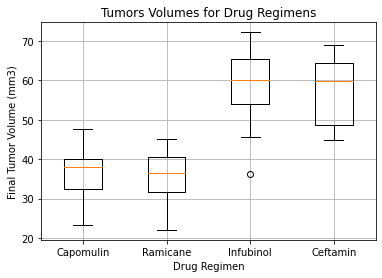

<Figure size 432x288 with 0 Axes>

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens
tumorvol_boxplot = [Capomulin_tumvol, Ramicane_tumvol, Infubinol_tumvol, Ceftamin_tumvol]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors Volumes for Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumorvol_boxplot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

#plt.savefig('boxplot')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.showmeans=True
plt.show()
plt.savefig("images/tumorvol_boxplot).png")

## Line and Scatter Plots

In [24]:
Capomulin_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [25]:
#Get unique Mouse IDs for Capomulin regimen
Capomulin_df['Mouse ID'].unique()

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

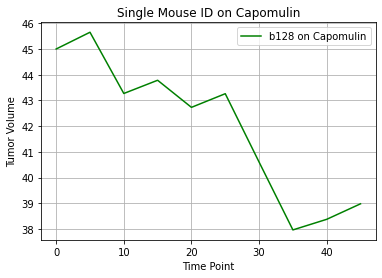

<Figure size 432x288 with 0 Axes>

In [35]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#select a unique Mouse ID to analyse
one_mouse = 'b128'
Capomulin_timexvol = clean_df[clean_df["Mouse ID"] == (one_mouse)]
Capomulin_timexvol

# Generate line plot
Capomulin_tp = Capomulin_timexvol.iloc[:,5]
Capomulin_tv = Capomulin_timexvol.iloc[:,6]
plt.plot(Capomulin_tp,Capomulin_tv, color="Green", label=(one_mouse) + ' on Capomulin')
plt.title("Single Mouse ID on Capomulin")
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
# Create a legend for our chart
plt.legend()
plt.show()
plt.savefig("images/single_mouse_Capomulin).png")

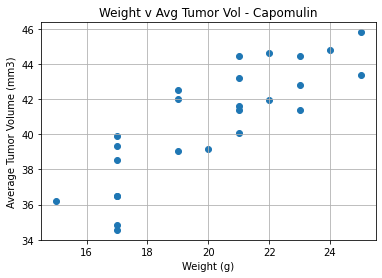

In [27]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_avg = Capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])
plt.title("Weight v Avg Tumor Vol - Capomulin")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.show()

## Correlation and Regression

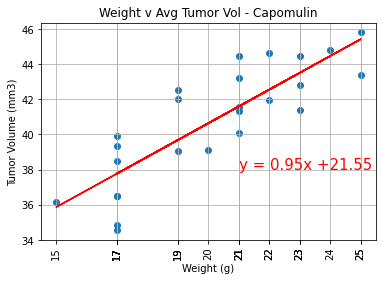

<Figure size 432x288 with 0 Axes>

In [34]:
# Calculate the correlation coefficient and linear regression model
correlation_coefficient =round(st.pearsonr(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])[0],2)
correlation_coefficient

# linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Perform a linear regression on tumor volume v weight for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(Capomulin_avg['Weight (g)'], Capomulin_avg['Tumor Volume (mm3)'])

# Create equation of line to calculate predicted tumor volume for the weight
regress_values = Capomulin_avg['Weight (g)'] * slope + intercept
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Plot the linear model on top of scatter plot 
weight = Capomulin_avg['Weight (g)']
average_tumor = Capomulin_avg['Tumor Volume (mm3)']
plt.scatter(weight,average_tumor)
plt.title("Weight v Avg Tumor Vol - Capomulin")
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(21,38),fontsize=15,color="red")
plt.xticks(weight, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.show()
plt.savefig("images/Weight_v_AvgTumorVol_Capomulin).png")

In [29]:
# Print Analysis
print(f"The correlation between mouse weight and average tumor volume is {correlation_coefficient}")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
print(regress_values)

The correlation between mouse weight and average tumor volume is 0.84
The r-value is: 0.7088568047708717
y = 0.95x +21.55
Mouse ID
b128    42.549834
b742    41.595394
f966    37.777635
g288    39.686515
g316    42.549834
i557    44.458713
i738    40.640954
j119    43.504273
j246    41.595394
l509    41.595394
l897    39.686515
m601    37.777635
m957    39.686515
r157    45.413153
r554    37.777635
r944    45.413153
s185    37.777635
s710    43.504273
t565    37.777635
u364    37.777635
v923    41.595394
w150    43.504273
w914    41.595394
x401    35.868756
y793    37.777635
Name: Weight (g), dtype: float64
